In [1]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy 

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import tweepy #used to work with Twitter's API
import webbrowser
import time
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import json

In [4]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN" #pulled from developer account for Twitter
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ" #pulled from developer account for Twitter
#key and secret is generated by Twitter developer account

In [5]:
callback_uri = 'oob'#url 

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri) #authorization to pull data from Twitter's API
redirect_url = auth.get_authorization_url() 
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=pugxQAAAAAABQdBPAAABeoieXsI


In [7]:
webbrowser.open(redirect_url)

True

In [8]:
user_pint_input = input("What's the pin value? ") #this is based upon Twitter Developer account
#Pin is generated new everytime this cell is run

What's the pin value? 9753921


In [9]:
auth.get_access_token(user_pint_input)

('781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2',
 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41')

In [10]:
print(auth.access_token, auth.access_token_secret)

781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2 fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41


In [11]:
api = tweepy.API(auth)

In [12]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append("user")
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [13]:
# pulls data from Visual Studio Code's twitter page https://twitter.com/code
screen_name = "code"
#user = api.get_user(screen_name)
#user_timeline = user.timeline(screen_name)  # recent tweets are pulled in the spreadsheet
#print(user_timeline) 
# fetching the statuses
user_timeline = api.user_timeline(screen_name, count=200)#tweet count limit is 200
df1 = extract_timeline_as_df(user_timeline)
print(df1)


     retweet_count           source  in_reply_to_user_id               id_str  \
0               18        TweetDeck                  NaN  1413262003548737541   
1                1        TweetDeck         1.225467e+18  1413201674873626627   
2              119  Twitter Web App                  NaN  1413196033585139714   
3               90           Buffer                  NaN  1413158980084539396   
4               41           Buffer                  NaN  1412894699166257158   
..             ...              ...                  ...                  ...   
195              7        TweetDeck                  NaN  1382833555370254336   
196             22           Buffer                  NaN  1382817260188884993   
197             18           Buffer                  NaN  1382759378881757188   
198              0        TweetDeck         2.937138e+08  1382746538934358017   
199            265           Buffer                  NaN  1382722397749448710   

    quoted_status_id_str in

In [14]:
screen_name = "code" #pulls data from Visual Studio Code's twitter page https://twitter.com/code
user = api.get_user(screen_name)
user_timeline = user.timeline() 
df1 = extract_timeline_as_df(user_timeline) #recent tweets are pulled in the spreadsheet
df1.head(201)

retweet_count           source  in_reply_to_user_id               id_str  \
0              18        TweetDeck                  NaN  1413262003548737541   
1               1        TweetDeck         1.225467e+18  1413201674873626627   
2             119  Twitter Web App                  NaN  1413196033585139714   
3              90           Buffer                  NaN  1413158980084539396   
4              41           Buffer                  NaN  1412894699166257158   
5              43           Buffer                  NaN  1412845130818768897   
6               0        TweetDeck         1.427425e+07  1412821871075074048   
7              48        TweetDeck                  NaN  1412820977843507204   
8              24           Buffer                  NaN  1412475941717217284   
9              33        TweetDeck                  NaN  1412464287130394629   
10             25           Buffer                  NaN  1411372420166995972   
11            185        TweetDeck                  NaN  1411124902984257537   
12             10  Twitter Web App                  NaN  1410986658355425281   
13              0        TweetDeck         9.124164e+17  1410684377399443457   
14              6  Twitter Web App         1.175290e+07  1410683749948403713   
15            360           Buffer                  NaN  1410357985981960200   
16             28           Buffer                  NaN  1410292113359704066   
17              0        TweetDeck         2.450292e+08  1410270532734361600   
18             30           Buffer                  NaN  1410263612317392899   
19           9047           Buffer                  NaN  1409900970788667394   

   quoted_status_id_str in_reply_to_screen_name                   id lang  \
0                   NaN                     NaN  1413262003548737541   en   
1                   NaN          KlostermannSan  1413201674873626627   en   
2                   NaN                     NaN  1413196033585139714   en   
3                   NaN                     NaN  1413158980084539396   en   
4                   NaN                     NaN  1412894699166257158   en   
5   1410703348915793921                     NaN  1412845130818768897   en   
6                   NaN                jfarrell  1412821871075074048   en   
7                   NaN                     NaN  1412820977843507204   en   
8                   NaN                     NaN  1412475941717217284   en   
9                   NaN                     NaN  1412464287130394629   en   
10                  NaN                     NaN  1411372420166995972   en   
11                  NaN                     NaN  1411124902984257537   en   
12  1402329744482390016                     NaN  1410986658355425281   en   
13                  NaN                 xcolbyg  1410684377399443457   en   
14                  NaN               ryanguill  1410683749948403713   en   
15                  NaN                     NaN  1410357985981960200   en   
16  1410251789358694401                     NaN  1410292113359704066   en   
17  1409932287404240898            Stone_Ranger  1410270532734361600   en   
18                  NaN                     NaN  1410263612317392899   en   
19                  NaN                     NaN  1409900970788667394   en   

                                                 text  in_reply_to_status_id  \
0   RT @TylerLeonhardt: Look at that badge to open...                    NaN   
1   @KlostermannSan @github Traditionally, we've n...           1.413197e+18   
2   üéâ The June VS Code release is here! Check out ...                    NaN   
3   We üíö this WindowsNT-inspired theme by @manekin...                    NaN   
4   Coding in VS Code with @GitHub Copilot ü™Ñ\nhttp...                    NaN   
5   Have you seen our Machine Learning for beginne...                    NaN   
6   @jfarrell Yes! You can set language-specific e...           1.412564e+18   
7   RT @Soham_Asmi: Tired of seeing the same exten...   

In [15]:
df1.describe()

retweet_count  in_reply_to_user_id            id  \
count       20.00000         5.000000e+00  2.000000e+01   
mean       505.40000         4.275768e+17  1.411754e+18   
std       2012.27785         5.958533e+17  1.247753e+15   
min          0.00000         1.175290e+07  1.409901e+18   
25%          9.00000         1.427425e+07  1.410602e+18   
50%         29.00000         2.450292e+08  1.411918e+18   
75%         58.50000         9.124164e+17  1.412858e+18   
max       9047.00000         1.225467e+18  1.413262e+18   

       in_reply_to_status_id  quoted_status_id  favorite_count  
count           5.000000e+00      4.000000e+00       20.000000  
mean            1.411359e+18      1.408304e+18       89.800000  
std             1.415824e+15      3.995573e+15      160.655761  
min             1.410177e+18      1.402330e+18        0.000000  
25%             1.410252e+18      1.408032e+18        0.000000  
50%             1.410607e+18      1.410092e+18        1.000000  
75%             1.412564e+18      1.410365e+18      104.750000  
max             1.413197e+18      1.410703e+18      495.000000

In [16]:
df1.shape

(20, 17)

In [17]:
df1.to_csv('tweetspreadsheet.csv', index=False)

### CH Jul 7 - starting here with processing the df

In [18]:
import pandas as pd

In [19]:
df1_saved_file = pd.read_csv('tweetspreadsheet.csv')
df1_saved_file.head()

retweet_count           source  in_reply_to_user_id               id_str  \
0             18        TweetDeck                  NaN  1413262003548737541   
1              1        TweetDeck         1.225467e+18  1413201674873626627   
2            119  Twitter Web App                  NaN  1413196033585139714   
3             90           Buffer                  NaN  1413158980084539396   
4             41           Buffer                  NaN  1412894699166257158   

   quoted_status_id_str in_reply_to_screen_name                   id lang  \
0                   NaN                     NaN  1413262003548737541   en   
1                   NaN          KlostermannSan  1413201674873626627   en   
2                   NaN                     NaN  1413196033585139714   en   
3                   NaN                     NaN  1413158980084539396   en   
4                   NaN                     NaN  1412894699166257158   en   

                                                text  in_reply_to_status_id  \
0  RT @TylerLeonhardt: Look at that badge to open...                    NaN   
1  @KlostermannSan @github Traditionally, we've n...           1.413197e+18   
2  üéâ The June VS Code release is here! Check out ...                    NaN   
3  We üíö this WindowsNT-inspired theme by @manekin...                    NaN   
4  Coding in VS Code with @GitHub Copilot ü™Ñ\nhttp...                    NaN   

   in_reply_to_status_id_str  quoted_status_id  favorite_count  \
0                        NaN               NaN               0   
1               1.413197e+18               NaN              20   
2                        NaN               NaN             476   
3                        NaN               NaN             495   
4                        NaN               NaN             213   

   in_reply_to_user_id_str                                    source_url  \
0                      NaN  https://about.twitter.com/products/tweetdeck   
1             1.225467e+18  https://about.twitter.com/products/tweetdeck   
2                      NaN                    https://mobile.twitter.com   
3                      NaN                            https://buffer.com   
4                      NaN                            https://buffer.com   

   user author  
0  code   code  
1  code   code  
2  code   code  
3  code   code  
4  code   code

In [20]:
# screen name of the account to be fetched
screen_name = "code"
  
# number of statuses to be fetched
count = 3
  
# fetching the statuses
statuses = api.user_timeline(screen_name, count = count)
  
# printing the statuses
for status in statuses:
    print(status.text, end = "\n\n") 

RT @TylerLeonhardt: Look at that badge to open in @code ‚ú®

Pretty easy markdown to add to README in a GitHub repo:

[![Open in Visual Studi‚Ä¶

@KlostermannSan @github Traditionally, we've named releases according to the month work was done in. Our team did m‚Ä¶ https://t.co/pNeyRFMsU9

üéâ The June VS Code release is here! Check out what‚Äôs new:

üñ• Open a terminal in the editor area
üßÆ Add math formulas‚Ä¶ https://t.co/49QTi1HxCu



In [21]:
#search_words = ["#covid19", "2020", "lockdown"]
key_word = '@code' #searches all tweets that reference the key_word specified 
date_since = "2021-06-21"

tweets = tweepy.Cursor(api.search, key_word, geocode="38.892062,-77.019912,3000km", lang="en", since=date_since).items(10)
## the geocode is for Washington, DC; format for geocode="lattitude,longitude,radius"
## radius should be in miles or km
#items references the number of tweets to pull 


for tweet in tweets:
    print("created_at: {}\nuser: {}\ntweet text: {}\ngeo_location: {}".
            format(tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location))
    print("\n")
## tweet.user.location will give you the general location of the user and not the particular location for the tweet itself, as it turns out, most of the users do not share the exact location of the tweet

created_at: 2021-07-08 23:59:47
user: dpcbiz
tweet text: Honestly, @Code, I agree with all your decisions on this. I've had to do this a bunch of times but one approval is‚Ä¶ https://t.co/hPZApupQzX
geo_location: East Greenwich, RI


created_at: 2021-07-08 22:27:06
user: cyrus_zei
tweet text: @TylerLeonhardt @code Nice !!!! Love it
geo_location: Sweden


created_at: 2021-07-08 21:23:44
user: joesakthatsme
tweet text: @code @github i get https error trying to download vs code
geo_location: Guadalajara, Jalisco


created_at: 2021-07-08 21:23:32
user: h3techdev
tweet text: @jongallant @code I *did* see a deep link in the wild that implied a "vscode-insiders" path but whatever does the r‚Ä¶ https://t.co/ZEmRhXdLaF
geo_location: Los Angeles


created_at: 2021-07-08 20:57:10
user: _jake_lynch
tweet text: open source improvement project idea - fix @code's search functionality
geo_location: New York, NY


created_at: 2021-07-08 20:45:37
user: deafGonzo
tweet text: @John_Papa @code Ok @rafaelhe

In [22]:
date_since = '2021-06-14'
date_until = '2021-06-21'
tweets = tweepy.Cursor(api.search,q='test', since=date_since,until=date_until).items(10)
for tweet in tweets:         
    print (tweet.text)  

In [23]:
for status in tweepy.Cursor(api.user_timeline, screen_name='@code', tweet_mode="extended").items():
    print(status.full_text)

RT @TylerLeonhardt: Look at that badge to open in @code ‚ú®

Pretty easy markdown to add to README in a GitHub repo:

[![Open in Visual Studi‚Ä¶
@KlostermannSan @github Traditionally, we've named releases according to the month work was done in. Our team did most of the work for this release in June, so this is the June release!
üéâ The June VS Code release is here! Check out what‚Äôs new:

üñ• Open a terminal in the editor area
üßÆ Add math formulas to Markdown
üîñ ‚ÄúOpen in VS Code‚Äù badge for @GitHub repos
‚Ä¶and more!

Release notes: https://t.co/ik1X7EvE2o
Download: https://t.co/rLDTD8Hj2J https://t.co/oXvsjacAPA
We üíö this WindowsNT-inspired theme by @manekinekko. For the nostalgic ones ‚ò∫Ô∏è
https://t.co/S7IGMgfVwj https://t.co/3mwbjLkPlN
Coding in VS Code with @GitHub Copilot ü™Ñ
https://t.co/4SYDyYFYQ4
Have you seen our Machine Learning for beginner course? üéì Get started with ML using notebooks in VS Codeüëá https://t.co/QmezIHoZpn
@jfarrell Yes! You can set lang

@olafurw We are working to make development environments safer and reduce the possibility of supply-chain attacks, even in code that is cloned locally. You can read more in the link below, but please do share your feedback with us on how it could be improved. https://t.co/O9FnntW1gx
RT @miguelsolorio_: üöÄ Now that we shipped terminal tabs in @code, I wanted to share a little bit of the backstory of how it all came about.‚Ä¶
Missed the live event? üéâ You can now watch the recording on our YouTube channel.
Link üëâ https://t.co/cDBBuSuuh9 https://t.co/sJjzNWkikA
@theGoldyMan @mattbierner We are on Electron 12 currently in the Stable branch
üéâ The May @code release is here! Check out what's new:

üìñ Remote Repositories to read code w/o cloning 
üö∂üèΩ‚Äç‚ôÄÔ∏è"Getting Started" product walk-throughs
‚úîÔ∏è Safe code browsing with Workspace Trust
...and more!

Release notes: https://t.co/vlQb1l5wyc
Download: https://t.co/1CSkQpMbwd https://t.co/OTu4omncay
üì£ We're going live sh

The Student Zone at #MSBuild welcomes all students, career changers, life-long learners, and even professionals!
You'll find awesome sessions about tech like VS Code, GitHub, AI‚Ä¶ and languages like Python, Javascript, C#, and more.
Start learning üëâ https://t.co/lvdEC7YKJV https://t.co/VgRd4VL5M4
The latest version of the #Python extension for VS Code now includes the new Pylance language server by default for a much better Python editing experience üêç
Read more üîó https://t.co/xdLwpMHZGN https://t.co/8NtJHCoJbg
Starting in a few mins! Join our release party for VS Code 1.56 and Q&amp;A with the team üì∫
Join live üëâ https://t.co/iPWBnPU2BC https://t.co/g2Lu0Z8i6y
RT @filipmares: TIL that you can build @MicrosoftTeams apps from @code using the Teams Toolkit. Love to see all this come together. 

https‚Ä¶
How-to with VS Code üëá
1Ô∏è‚É£ Set language mode as JSON
2Ô∏è‚É£ Paste your JSON
3Ô∏è‚É£ From the command palette (CTRL+SHIFT+P or CMD+SHIFT+P) run "&gt; Format document" 

üçø Starting soon! Join us for a livestream and Q&amp;A about the new notebook extensions in VS Code.
Learn what's coming and the APIs you can use to build your own too üìò

Starting LIVE in 10 mins ‚ñ∂Ô∏è https://t.co/iPWBnPU2BC https://t.co/U8YuEwRiKE
We have a new VS Code extension for developers using CUDA, built in partnership with Nvidia, that will help building apps that use GPU acceleration for massively-parallel computing üëá https://t.co/5E4fiZo7Nf
Want to know more about the new notebook extensions in VS Code, and custom notebooks like the RESTbook? üìò Don't miss @_tanhakabir's livestream and Q&amp;A tomorrow, to learn about them and how YOU can build your own! üßë‚Äçüíª
More info üëâhttps://t.co/DPze49WGS6 https://t.co/YCd3XrYaXH
RT @mattbierner: Today's @code tip: Problems filter negation

Use ! to negate the problems view filter. '!foo' for example only shows probl‚Ä¶
RT @davidpine7: Sometimes when you're doing all the @code things, you just need a little Zen. Try

Yesterday we talked with @ShinanYotam as he was giving us a demo of AI-assisted auto-complete in VS Code with @Tabnine_ (and what the future of coding might be like!) üì∫
If you missed the session, you can catch the recording on-demand now üëâ https://t.co/yk0MYPqPCs https://t.co/3nsnH2sEvV
Check out this fun tool by @miketromba to make your own themes for VS Code üé®

Feel free to share your creations with us in the comments üßë‚Äçüé®
https://t.co/AE52zuD4L3
RT @RobLauer: Your First Steps with @Raspberry_Pi Pico and Visual Studio @Code

I had fun experimenting a bit with MicroPython on the Pico,‚Ä¶
RT @fbricon: Cool new feature: the @rhdevelopers 's YAML extension for @code now displays a link to the schema used to validate the current‚Ä¶
üì∫ Starting in 10 mins! We're talking with @ShinanYotam from @Tabnine_ about AI-driven autocomplete in VS Code üíª Join us for the live session and Q&amp;A on @LearnTV
Join live üëâ https://t.co/iPWBnPCrd2
RT @eliostruyf: Publishing your #VS

RT @codepo8: üö® Hot off the press: Microsoft Edge Devtools for @code version 1.1.4. 
üëâüèª Interact with your web project and debug CSS/network‚Ä¶
RT @LadyNaggaga: .NET Notebooks with SQL in @code!  Checkout #dotnetinteractive latest blog post in collaboration with @azuredatastudio on‚Ä¶
RT @davidpine7: üîç I'm often amazed at how many developers are unaware of the keyboard shortcut to zoom in/out on their @code instances.

‚å®‚Ä¶
The February @code release is here! Check out what's new üéâ

üçé Apple Silicon builds now stable
üñãÔ∏è New themeable icons
üíª Persistent terminal processes
... and more!

Release notes: https://t.co/ahDVkF8age
Download: https://t.co/1CSkQpuA7D https://t.co/tpAIQVv5SN
RT @LostInTangent: If you're using @code and @reactnative, you can now use CodeSwing to prototype components üî• Just create a React Native s‚Ä¶
RT @rorypreddy: Azure API Management extension for Visual Studio @Code is now generally available.

-Manage and test APIs in API Managemen

RT @eamodio: Thoughts on a new exploration of showing unpublished commits/changes in the @code SCM view?

Please add your thoughts and feed‚Ä¶
VS Code tips and tricks by @Sana_Ajani üé©  PS: Watch till the end to learn how to enable Power Mode too üî•
Watch üé•  https://t.co/nVXXNvK2io https://t.co/HDKynQzc4G
RT @TylerLeonhardt: üßë‚Äçüíª Stream tomorrow 10AM PST (take 3) üéâ
https://t.co/lfWDeJuI9V

We'll look at the popular @code API called 'CodeLens'‚Ä¶
Quick recap of @pmckee's session at #VSCodeDay on using working @Docker in VS Code  üì¶
Watch the recording to learn more üëâ  https://t.co/JS3SIwBk9x https://t.co/Sz5x0y5cwe
Yesterday's launch party was fun!! üéä Missed it? Check out the recording below üëá
https://t.co/JTmO3vScMU https://t.co/bots8R04rG
@CodingWithJulia ... if you use setting sync, it is easy to set up a new machine. just install vs code on the new machine, turn on settings sync, then all those settings AND extensions will be brought down to the new machi

RT @TylerLeonhardt: Today, I made and published a @code extension in ~2hr (it's that easy!)

Take a look at the Twitch vod here: https://t.‚Ä¶
RT @faxtion: VSCode zoom only font not whole editor 
https://t.co/TfnvVZ9TaI
RT @mattwojo: Working on a new episode of Tabs vs Spaces with @BrigitMurtaugh about doing remote development with Docker Containers and the‚Ä¶
@Johnight1 @BrigitMurtaugh We will!

You can also optionally sign up on https://t.co/2ZVOzfkQSR to get an email reminder (we'll use your email only to send you a reminder before the event and a "thank you" note/recap after)
Coming up at #VSCodeDay: @BrigitMurtaugh will talk about Remote Development with VS Code, including SSH and Containers! üë©‚Äçüíªüë®‚Äçüíª Live on Jan 27 at 8am Pacific Time üóì
RSVP here üëâ https://t.co/2ZVOzfkQSR https://t.co/9260P4mlqM
RT @mattbierner: Today's @code tip: the minimap slider

The minimap slider shows the current viewport in the file. You can also click and d‚Ä¶
RT @amandaksilver: In 20

RT @LearnTV: There are over 115 MILLION daily active users on @MicrosoftTeams! üåéüåçüåè

Join us on December 16th at 9 AM üïò PDT to build your fi‚Ä¶
RT @graeme_fulton: I didn't know this exists until today üò≠..I can never can remember how to start a new component

Now just type 'rcc' and‚Ä¶
RT @JustinWGrote: Smart. Added to my @code default config. https://t.co/T6F1C1pP9o
RT @mattbierner: Today's @code tip: Saving search editors

Save search editors into your workspace as .code-search files. Open the file to‚Ä¶
@TylerLeonhardt Welcome! Excited for you to join the team! :)
RT @jayharr_is: Just realized that you can rename terminal tabs in VSCode.

Cmd + Shift + P &gt; Terminal:Rename https://t.co/dj7awt7D5G
üóØ Looking forward answering your questions at the "Ask Me Anything" tomorrow! Come join the VS Code product team for this free live event at 8am Seattle time (4pm London) üóì

üì∫ More info: https://t.co/XbmjE45mFJ https://t.co/58ikRgHAJl
üé• Livestream: https://t.co/FY

@SeanPlusPlus https://t.co/81HQV4bYu9
@zogface https://t.co/SkgZHGr8Dh
@frontenddude ‚Ä¶backup two months old and offsite
https://t.co/Ejosa9ND0k
"We pushed to production on Friday‚Ä¶" üò±

What's your dev horror story? Share it below in six words or less:
RT @mattbierner: Today's @code command: Add Cursors to Line Ends

Add a cursor at the end of each line of the current selection. Useful for‚Ä¶
RT @NillsF: ARM tools in @code are pretty awesome. Need to create a VM? Just type arm-vm-ubuntu &lt;enter&gt; and you get all boilerplate code. h‚Ä¶
RT @mattbierner: Today's @code extension: Docs View

Shows documentation at the current cursor position in the sidebar or panel. 

Features‚Ä¶
RT @mattbierner: Today's @code extension: Peacock

Give each VS Code window a distinct color based on the current workspace

Run `Peacock:‚Ä¶
RT @pythonvscode: The üéÉ October 2020 release of the #Python extension üêç for VS @code is here! This release brings Debugpy 1.0! Check out th‚Ä¶
@gbziskind You c

Join our team on Tuesday at 15:00 UTC for the launch party livestream! üóì1Ô∏è‚É£3Ô∏è‚É£üïíüåû We'll go through what's new in @Code 1.50 and answer your questions üí¨

üëâ Add to calendar: https://t.co/nE4PHMG4wu
@ItalyPaleAle @SabaJamalian @RobertCGreenII @BrigitMurtaugh here is a blog post: https://t.co/dZNdXgqg92
RT @demianborba: Great collaboration with @code and awesome partners on a brand new extension for Visual Studio Code to help designers and‚Ä¶
RT @logicappsio: New @code extension with the monitoring view update is now published.

Install via üëâ https://t.co/8no7G6fNoJ https://t.co/‚Ä¶
RT @tweetmonster999: You can preview your .md(markdown) file directly in your Visual Studio Code editor by using: 

Ctrl+K V

@code 
#Tips‚Ä¶
@andrejsharapov use the workbench.editor.pinnedTabSizing setting to change how the pinned tab should appear!
RT @TarasNovak: 8 months ago I created @mapbox token for #GeoDataViewer üó∫Ô∏è w/#keplerGL. Since then devs loaded over 50,000 maps with 

üì∫ Tune in NOW!
Join the @Code team and @_clarkio at 9am Pacific for the live event and launch party for VS Code 1.49 (August 2020 release).
Join online for free üëâ https://t.co/nE4PHMG4wu https://t.co/UsgVo1a29m
RT @mattbierner: Today's @code tip: debugger pretty print

Step into a minified file while debugging your #JavaScript? Try using the built-‚Ä¶
RT @eamodio: üì¢ Calling @code extension authors -- last call for sign ups for the Extension Authors call happening this Thursday!

Come join‚Ä¶
@BansalVks Hey there! You could modify the zoom level of your workspace specifically, rather than the zoom level found in user settings. https://t.co/WaDw1F4okR
Don't forget this is TOMORROW! üìÖ Tune in for a live event and Q&amp;A with the VS Code team and @_clarkio at 9am Pacific. We'll share what's new in @code v1.49 (August 2020 release) and we'll answer your questions. üí¨

More info and save the date üëâ https://t.co/bH9Z2mbDH7 https://t.co/MPlwW0AbIS
RT @Jureid22: We're proud to

@sabinthedev It looks like you want to customize your color theme: https://t.co/ZFkCnk92Eh. 

For the specific highlights you've pointed out, you could start off with your Activity Bar: activityBarBadge.background and activityBar.activeBorder.
RT @madyanalj: Do you (like me) use @code's git integration to view your diffs and wish to hide irrelevant whitespace changes so that you c‚Ä¶
RT @britnorcodes: Whats a VS code extension you've been enjoying lately? Or one that's improved your workflow?

Mine is ErrorLens! ‚ö†Ô∏è #vsco‚Ä¶
@0amaam @_clarkio Yes we'll publish the recording on YouTube shortly
RT @mattbierner: Today's @code command: Reveal in explorer

The 'Reveal in Explorer' command ('Reveal in Finder' on MacOS) opens a file in‚Ä¶
RT @siddharthkmr1: #vscode tip

üî• Create custom snippets for repeating code patterns

‚ú® You can even specify the cursor position on success‚Ä¶
RT @mattbierner: Today's @code tip: Issue and username hovers 

The GitHub Pull Requests and Issues extensi

RT @SteveGodderidge: Did you know you can use "*" in the advanced search options in @code to search for similar subfolders across multiple‚Ä¶
RT @OlenaDrugalya: This is one of the most useful extensions in VS Code for React developers:
#100DaysOfCode #reactjs https://t.co/M7m9hsXo‚Ä¶
@sympmarc sorry about that! can you open an issue in the extension's repository? https://t.co/yriznpmeUD
üì¢ Tip 18: You can make your commits on @GitHub verified, along with a big green badge ‚úÖ How?!?! Using GPG and VS Code to sign your commits.
 
üëâ For more GitHub goodness: https://t.co/UnmIYH6E3N

#ABitAboutGit https://t.co/bpTDVsptYb
RT @stefanjudis: When did it become so easy to debug Node in @code? üò≤

I still remember the times where we had to mess around with configs‚Ä¶
@ValentinHervieu @SmarterCoding In the diff view, you can select a range of lines, then right-click and choose "stage selected range" https://t.co/saxs5rk4Aa
üì¢ Tip 17: The Source Control view in VS Code lets you stage spe

RT @pythonvscode: üì¢ Our new Pylance extension is on the VS Code marketplace today! Pylance supercharges #Python in @Code with robust, perfo‚Ä¶
RT @mattbierner: Today's @code setting: typescript.implementationsCodeLens.enabled

Show the number of implementations above interface and‚Ä¶
@self_agency sorry, can you please file an issue?
RT @mattbierner: Working with a large #JavaScript or #TypeScript project in @code? We're exploring enabling some IntelliSense features whil‚Ä¶
üì¢ Tip 2: TFW you've opened up a new @code window and started hacking away, only to remember you haven't saved your work yet ü§¶üèæ

Now you can easily initialize a repo or publish your project to a @github repository

üëâüèæ For more GitHub goodness check out https://t.co/UnmIYH6E3N https://t.co/uFK17q8DdA
@adityaoberai1 @justme_simran @ekuekanshgupta @Nandini47014001 @IamPablo @MSFTImagine @MLHacks nice!
RT @WindowsDocs: Intro to VS Code Replay

So you've written your app and now you're ready to run it. Wh

üì∫ @slace is LIVE at #MSBuild to discuss remote development with #VSCode üíª‚ÜîÔ∏èüñ• Tune in now and join the Q&amp;A for free:
https://t.co/4OPCSXrZNC https://t.co/XmDD3OTRCr
@code fun tip of the day, emoji characters work just fine in user settings, like for the title separator character... https://t.co/YYuMmKP8ZX https://t.co/TRSR0ACwDi
üì∫ NOW at #MSBuild: @LostInTangent‚Äôs session on how to be productive with your team while remote. Come learn about how #VSCode and #VSCodespaces enable devs to WFH effectively and collaborate üéí Tune in here for free and join the Q&amp;A: https://t.co/4jVl1Vnwqp https://t.co/z9ZJe07UOq
@totollygeek @jekyllrb Of course! And also Hugo or your favorite static site generator. Anything that can be built with a GitHub Action.
üì∫ Use #Python with #VSCode to build web apps and process data with @Azure serverless üêç @NicolasGarfink1 is streaming live NOW at #MSBuild to show you how. Tune in for free:
https://t.co/qUvnfy3KnS https://t.co/9Tsoybr

RT @joaomoreno: It's amazing how far we've come in 5 years. Happy Birthday @code! üéÇ https://t.co/AFPnLbwM9A
RT @_clarkio: ü•≥ Happy Public Preview Birthday @code üéÇ

Today marks 5 years since the first public preview and roughly 4 years since version‚Ä¶
RT @mbcrump: I'll be chatting with @cecilphillip on #AzureTipsAndTricks "Lunch Edition" today at 1PM PST (4 PM EST) on Visual Studio @code‚Ä¶
RT @sitepointdotcom: Level up your Visual Studio @code productivity. Learn about‚Ä¶

- ‚ö°Ô∏è working with projects &amp; version control
- üé® user &amp;‚Ä¶
RT @mattbierner: Today's @code tip: copy path and copy relative path

Right click on a file in VS Code's explorer to copy the file's absolu‚Ä¶
RT @christof_marti: The latest Remote-Containers (0.113.0) for VS @code Insiders comes with support for #WSL2. This requires Windows Inside‚Ä¶
RT @christof_marti: The latest Remote-Containers (0.113.0) for VS @code Insiders comes with support for #Podman. This requires a `docker` s‚Ä¶
RT @kossno

RT @retgits: Trying to build a few cool things with @typescript in @code... I just learned it automatically updated my imports when I updat‚Ä¶
RT @pustelto: VS @code tip of the day - You can easily toggle inline or block comments in all supported languages using Toggle Block/Line C‚Ä¶
RT @Stegosource: HOT TIP:
If you're using VS @code, you can put

// @ts-check 

At the top of any #javascript file. Then document your code‚Ä¶
RT @mattbierner: Today's @code keybinding: F9, toggle breakpoint

Use the toggle breakpoint command to add or remove a breakpoint on the cu‚Ä¶
@thevarunraja yes they will! see https://t.co/rTNghgmJZL
RT @DevOpsDerek: In @Azure Cloud Shell, what's your favorite command? Mine has to be Code, so I can launch a cut down of @code. https://t.c‚Ä¶
RT @mattbierner: Today's @code tip: ext install

Install extensions using the command palette by typing 'ext install' followed by the exten‚Ä¶
RT @singhkays: finding vs @code zen mode to be the perfect distraction-free environme

RT @eamodio: üì¢Calling all @code extension authors!

I've posted a proposal for improving our feedback loop with extension authors. Please a‚Ä¶
RT @mattbierner: Today's @code command: Fold all block comments

Collapse all block comments in the current file. Use the 'Unfold all' comm‚Ä¶
Check out this talk about how our team does open source design from @miguelsolorio_ :) https://t.co/KdxViyVjgO
RT @fiveisprime: If you're building extensions in @code, please check this issue out. Let us know how we can make extension development bet‚Ä¶
RT @tnorthcutt: I've been using @code more lately but got annoyed that using a `watch` command to compile js meant that it was being consta‚Ä¶
@DaneCreekPhoto he @drosenwasser  thoughts?
RT @AzureDevOps: #VisualStudio @Code is a large project with lots of moving parts and an active participant list. See how we used the Azure‚Ä¶
RT @oktadev: Are you a @nodejs developer new to VS @code? Check out the top 10 VS Code extensions you need! https://t.co/tzPOjn

RT @JustinWGrote: Latest #vscode #insiders now changes "Untitled" document titles to whatever your first line of code is. May take some get‚Ä¶
RT @MontygSharma: Amazing shortcuts in #vscode https://t.co/vL5uGbPIiq
RT @_clarkio: Routing and Decorators - Building an API in Python with Flask. @cecilphillip and I will be digging into this live today at 11‚Ä¶
RT @davidpookpook: View more than one line in search #vscode
@vscodetips @vscodetricks  #vscodetricks @code https://t.co/ucnjrAd68a
RT @mattbierner: Today's @code command: go to symbol in file

Quickly jump to variables, function definitions, and more in a file
 
Windows‚Ä¶
RT @WindowsDocs: Introduction to #VSCode Part 2

In the next video in our series, SteVen Batten, @monekoluv, talks about how you can use an‚Ä¶
RT @mattbierner: Today's @code tip: smart selection

Quickly expand the current selection based on the structure of your code

Windows/Linu‚Ä¶
New to coding? We'll be sharing videos over the next few weeks going over the fund

RT @ASpittel: Seeing a lot of people picking up Python for #AdventOfCode and seeing some confusion on reading from a file. Here's the code‚Ä¶
RT @j_niewczas: in @code if you press alt and open a file from file explorer, the file will be opened in a new tab.

#vscode #productivity‚Ä¶
RT @_clarkio: üè† It's done! Here is the highlights video for @code's October release.

Learn about features like split editor sizing, improv‚Ä¶
RT @octref: Now you can edit the opening/closing HTML tag at the same time in @code.

Try it in https://t.co/q8BhKj2Z1U https://t.co/pNN0ei‚Ä¶
RT @MicrosoftLearn: This December we will be counting down to the new year by reflecting on some of our favorite dev moments from 2019! Fol‚Ä¶
RT @Tyriar: Ever have issues with theme colors in your @code terminal not playing well together? Coming soon you will be able to set a min‚Ä¶
Thank you so much for all the feedback y'all, this is awesome! We'll go back and think about this some more. Our end goal here is to improve t

RT @NoWaySheCodes: Hey JavaScript &amp; TypeScript devs! I would love to get some feedback from you on certain testing frameworks and tools! He‚Ä¶
üì° Remote Development Tip üíª

Tired of entering your password when connecting to a host from the Remote ‚Äì SSH extension? See here for info on setting up public key based authentication instead! https://t.co/lfZ4g89RaT
RT @fiveisprime: The latest update to the App Service extension for @code is out! This release includes improvements for .NET Core deployme‚Ä¶
RT @Filisha12: Coding at #technical #interviews feels like being asked to paint an abstract expressionist painting with a knife and tongs;‚Ä¶
RT @chrisoncode: Neat VS @Code trick when you rename files

Automatically makes a folder if you type a / https://t.co/3Vf0UYhW7b
üì° Remote Development Tip üíª

Using Remote - SSH but want to use a local tool with your remote source code as well? Learn how SSHFS and rsync can help: https://t.co/Ip3wCcjrqQ https://t.co/0IcY9ZgKzF
RT @mattbie

@asmockler sorry about this... @drosenwasser can help here.
RT @vkarampinis: üëÄ5 Visual Studio Code Tricks to Boost Your #Productivity by @hexrcs https://t.co/8VeNwwoAWX #vscode https://t.co/cOe37VISsc
RT @SasStu: #WindowsSubsystemforLinuxWSL Tips and Tricks for Linux development with WSL and Visual Studio Code https://t.co/hxYUFhtUnA http‚Ä¶
@brena_nelson hmmm sorry about this. is this folder the root of the git workspace?  is there a .git folder there?  might be easier to open an issue (Help -&gt; Report Issue) with as much info as possible, including a pointer to the repo if possible.
RT @GoodVibra: ‚úΩ How to debug Azure Functions with Visual Studio Code | Azure Tips and Tricks #tech ‚û∫ https://t.co/b1CCOEUi5d https://t.co/‚Ä¶
RT @zersiax: Anyone using #babel or #JavaScript with #wsl, preferably wsl2 and @code? I'd like to talk to you about your workflow? Having a‚Ä¶
@sqs @serenadeai @AtomEditor super cool!  We would love to learn more about this ... can you send me email? (cdia

@Radjammin @DHowett @richturn_ms try the WSL extension for VS Code https://t.co/rbEH32LnnB its like butter!
@yopez83 hi - sorry about this... what are the problems you are running into?
@praveenogirala Hey @XiaokaiHe can you help here?
@VisualStudio @alysha_arshad hi - sorry about this.  can you file an issue?  Help -&gt; Report issue or https://t.co/MeSI3PZvRe
RT @endi24: üíªThe guide to Visual Studio ‚Å¶@code‚Å© shortcuts, higher productivity and 30 of my favourite shortcuts you need to learn - DEV Com‚Ä¶
RT @_clarkio: ü¶∫ Save yourself from unwanted prompts on exit AND close of @code with the "files.hotExit" setting.

Change it to "onExitAndWi‚Ä¶
@andorbal @dotnet re: losing IntelliSense, are you using the Remote - WSL extension? https://t.co/rbEH32LnnB
@HotKreezy38 hmmm, can you report this as an issue? https://t.co/LGjAWFW0z9
@abijsummers Try reloading the window...otherwise, can you file an issue about what's happening? "Help &gt; Report Issue" thanks!
@Danbo looks like someone

@_WPCasts_tv_ sort of ... you could put "window.zoomLevel": &lt;value&gt; in the workspace' settings.json file and that will zoom on a per workspace basis, not a per window basis.
RT @obloch: Yeah, new release of the #Azure #IoT Workbench extension for @Code from my friend @Likidu and his team now comes with a preview‚Ä¶
@jpomfret @miguelsolorio_ is a magician!
RT @AzureFunctions: Did you know #AzureFunctions has an awesome @Code extension?
https://t.co/z1QgfhsKvK https://t.co/CLwX27ai4D
@wwahammy "can't work around technical limitations" is a standard term used in our licenses. just means if there are restrictions in the software such as restricting access to a "for pay" feature, you can't "work around" those so that you get the feature for free. sorry for confusion.
@dkazmer hi sorry about this, can you please submit an issue? Help | Report Issue or https://t.co/MeSI3PZvRe  thanks.
RT @chaseadamsio: Ever wonder what command a keyboard shortcut was bound to in @code? It's easy to find

RT @spietrek: ‚ÄúBasic Debugging in Visual Studio Code‚Äù by @prosetech ‚Å¶@code‚Å©  https://t.co/0FgY322sxq
@Damian_GarciaS do you have this extension: https://t.co/vEZVjWf1vr
@breezweb Hi - not sure what you mean, do you have a picture?
@CPorteous @TylerLeonhardt @PSConfEU Thanks to @matvelloso for the inspiration :)
@nikovirtala working on it!  vote it up here too: https://t.co/N14rL3VmfU
@vcarl_ Try Logpoints in VS Code, no need to even write console.log !  https://t.co/wAMFWszvVo
@lgarron you can always remap the F12 keybinding to something not on the touchbar... this changes it to Alt+G:
    {
        "key": "alt+g",
        "command": "editor.action.revealDefinition",
        "when": "editorHasDefinitionProvider &amp;&amp; editorTextFocus &amp;&amp; !isInEmbeddedEditor"
    }
@nickytonline Hi sorry about this, but i believe its this issue https://t.co/pKg0R4mCV8 which @Tyriar just fixed.
RT @AzureCosmosDB: [Download] #CosmosDB Support for #VSCode | Azure Cosmos DB database + VSC

@GCoucoune please upvote here: https://t.co/cw6saJNozV also, the Setting Sync extension is very popular too https://t.co/y1Zx0RTyrP
@colincui @brettsky @pythonvscode Hi - can you be more specific about the problems you are having in the terminal? What platform, exact steps, etc.?  Can you please submit an issue? Help menu -&gt; Report Issue.  Thanks.   //cc @Tyriar
@alex_barashkov hi sorry about this, please upvote here: https://t.co/mVlIKcKEAg
RT @samcogan: Loving the new expression colourisation in the ARM Template VS Code Extension https://t.co/PZYO8nHjJV https://t.co/dy2YGgFktW
@faqndoE97 strange... Stable? Can you submit an issue? On the Help menu, choose Report Issue.  thx.
@wschleumer try zen mode! CMD+K, Z 
https://t.co/TkDFbZPppH
@cmendibl3 hmmm thats not good sorry.  can you report an issue https://t.co/4sQq4agJVs
@svdreamline @DonovanBrown you can also temporarily set the language type to enable the extension. so if you are writing a bash script and want to have some az cli 

RT @OpenAtMicrosoft: In this Twitch recording, @_clarkio and @as_w walk through setting up Windows Subsystem for Linux (WSL). 

Learn how t‚Ä¶
RT @qubitron: Excited to show off the latest and greatest for #Python devs in @code! Check out my session to see some new things in @python‚Ä¶
Some background on the #vsliveshare and what's coming in the future: https://t.co/pW12RHiINw
RT @NateTheFinch: #golang pro-tip: update your third party tools regularly, *especially* if you're using go modules (there are a lot of rec‚Ä¶
RT @_clarkio: üì¢ New VS Code release highlights video üì¢

Missed the most recent release? No problem. Learn about features like convert to de‚Ä¶
RT @auchenberg: ü•Å  Drumroll please! It's time for another update of Browser Preview for @code ü•Å

You can now emulate multiple devices at th‚Ä¶
RT @AkronWiT: Are you joining us for our next event? TDD in .Net is a beginner friendly workshop. All you need to participate is Visual Stu‚Ä¶
RT @msdev: #AzureIoTEdge for VS Code 

RT @chaddonohue: Looking for a way to remove a key binding that conflicts with another extension in @code ? Just copy it over and prefix th‚Ä¶
RT @mattbierner: The latest @code insiders now automatically restores your #markdown previews when you restart the editor. Try it out and l‚Ä¶
RT @JamesMontemagno: This new @code extension for MS docs is amazing and great just for devs writing markdown! https://t.co/U87olz3NLz Mind‚Ä¶
RT @ramyanexus: When wrapping text with abbreviation using #emmet in the latest update to @code you can now see the live preview of the res‚Ä¶
@BenCodeGeek Hi Ben! Oh no! Can we get you to open an issue on GitHub, https://t.co/0Gitrq7yIJ with more details? We'd love to debug it and get you going again
RT @_jonjoe: Just created a series of @code typescript react snippets for pure components, container and impure components.

https://t.co/q‚Ä¶
RT @nmpallas: If you are looking for an alternative full open sourced way of developing java with alot of tools and integrati

RT @_clarkio: It‚Äôs cold ‚ùÑÔ∏è out there but the üî• in the latest @code release will be sure to warm you up!
Full details üëâ https://t.co/ET0VbaC‚Ä¶
RT @TylerLeonhardt: Exciting news! üì∞

I finished my work on the #PowerShell Gallery. Forward, I will be continuing @daviwil's work on PS to‚Ä¶
RT @NicoPennec: A big thanks to @code for these two new features very useful in my daily life of developer:
‚ñ™Ô∏èError indicators in the Explo‚Ä¶
RT @auchenberg: You can now debug @vuejs directly from @code and even use @ChromeDevTools at the same time! üí•üî• More info: https://t.co/SBWJ‚Ä¶
RT @MSFTEnable: Visual Studio Code: Terminal screen reader support ‚Äì Integrated Terminal now has "Screen Reader Optimized" mode. https://t.‚Ä¶
RT @ramyanexus: Thanks to @gushuro, vendor prefixes are now included when you start your css @emmetio abbreviations with - in @code. Use th‚Ä¶
Starting 2018 off strong with a feature packed January update of @code! üöÄDownload: https://t.co/jjhF3nxpcc and s

Curious to see what's new in Visual Studio @code? Let @auchenberg show you what we have been up to

üé¨üçø üëâ https://t.co/pPqGRtZFKa https://t.co/n8MkzlsZSW
RT @mattbierner: #VSCodeTip: Hold ctrl (‚åò on mac) when selecting a file in @code's quick open to open it to the side of the current editor‚Ä¶
More Git improvements: review and stage changes directly inline! Get the latest @code: https://t.co/RQKmedNKfz https://t.co/A5dOzVouW0
Launch debug sessions quickly with the new shortcut in the @code status bar. See what else is new in our latest release: https://t.co/0XIBX0mBp6 https://t.co/7tNO72Q7oW
RT @auchenberg: Happy to announce a preview of the @notepad_plus 
keymap for @code ‚å®Ô∏èüéâ üéàKeep your muscle memory intact when using @code! ht‚Ä¶
More Java goodness - Java Test Runner extension (with JUnit support) available for @code! https://t.co/CsonyhSCFD https://t.co/2fkCRoUmt0
New Git improvements: see file status at-a-glance in the explorer. See what else is new in @code th

@futuraprime Ah - I understand now - Help-&gt;Feature Request :)
@eirkeirkeirk That should not happen sorry - have you upgraded the extension to the latest version?  If so fell free to file an issue (the @code team also publishes that extension) https://t.co/NbvGXwuBe9
RT @eamodio: üì£ GitLens 6 for @code is out now! By far the best and fastest release yet! 
Multi-root workspace support, üî•new logo, üèé¬†faster‚Ä¶
RT @RobertDuraj: It will be a good Thursday morning. Outstanding @code refactoring feature! https://t.co/DUlwfn3co2
@tomitrescak How does this look to you :) https://t.co/20hUMAKkWl
@warpdesign_ @rduperr It's more about your local modules vs from NPM.
@indiehjaerta That's really strange - the best bet is 'help-&gt;Report Issue` that will give us additional context in the GitHub issue.
@urbantrout code --add &lt;dirname&gt; should do it (use the integrated terminal)
@futuraprime Something like  is possible - just flip the split view (for editors) via: https://t.co/iUVcr67A

RT @XiaokaiHe: Auto-resolve mainclass and external source support is there. Check out our @code Java Debugger update. #OpenSource https://t‚Ä¶
@maklipsa You should check out this doc will change your life... https://t.co/bp5yDIofk4
@bartplasmeijer Doh a bug we are on it.
@jeremytbrun It's a bug we are on it - sorry.
@da_parth17 Yes we us the insiders edition and dogfood on that daily.
@IonideProject Not 100% sure I understand the scenario - but auto complete for Emmet is pretty advanced (dynamic help text, snippet insertion)
Open Sourcing the Java Debugger for Visual Studio Code https://t.co/NdF7u05tNB
Nice tutorial from Hacker Noon on debugging React with the Chrome debugging extension for VS Code: https://t.co/bnT0emqRtN
@CH_Breakthrough Apologies this should be resolved now
@amoghpalnitkar I just created a PR for the extension - currently only works with .js files (not .jsx) @burkeholland FYI
@Rayoplateado My best guess is you have a misbehaving extension - try starting with `code -

RT @wallabyjs: Wallaby for @code now has side-by-side diff link &amp; compact diff right in hover tip. Super useful for assertion diffs and @fb‚Ä¶
@csskarma @erunyon One thing that can help if coming from another editor are the keymaps: https://t.co/6yE6GUtw9r
RT @oliviernt: Loving the @code package.json autocompletion https://t.co/3z3dZ9kVZj
@KClarkADSTech Everything seams up and running now - can you give it another try?
@DGanoff Sorry about this we just pushed an update with this fix... https://t.co/pJKUTxVN2L
@SnowShock35 That should not happen - if it continues try starting with `code --disable-extensions` and if that does not work please `help-&gt;file issues`
@kylewelch Also a double click will open the file in non-preview mode https://t.co/8t16nu9diB
@javajoint Not today but we do think we will do this (a few months out however) push us along... by üëçhttps://t.co/0wYElsHXXO
@dstewart1017 @maxlynch That really should never happen - any chance we could get a little detail so we

@tdwright_ @wesbos Always more to do but have you seen the merge Code Lens https://t.co/a1gSN3nq1Z https://t.co/k9dfCViacD
RT @amandaksilver: StackOverflow smart bot for VS Code. @StackOverflow @code https://t.co/XJoFi0BovS
RT @meulta: Me: Just tested #Nodejs time travel debugging with @ChakraCore and @code 
Also me: https://t.co/WNVCCq1Lum
@chad_ramos Not good - +1 for Hot Exit - sorry
@micahgodbolt Unfortunately quite likely an upstream issue - none-the-less lets dig in and work it out :)
@micahgodbolt I believe  this is the same issue we are tracking here any details would help https://t.co/WIvMjdP4Xt coudl try `code --disable-gpu` as well
Another @code announcement from Ignite this time for #HDInsight @Azure https://t.co/D3kxdneBSB
@eubenesa There are file type specific settings e.g. 
    "[json]": {
        "editor.formatOnSave": false
    }
Could help https://t.co/rEIsfAGBBx
RT @john_lam: Looking forward to getting our @VisualStudio and @code based tools for Python and R to all @

@codepo8 @vogon Ideas- 1. If using Windows ensure u r using 64bit (for large files), 2. Turning off hot exist is best bet - but sounds like a bad idea
@parkervcp Hum - will depend on the language - could you file an issue in the extension repo if it's an extension or help-&gt;report issue if its JS/TS.
@fonnesbeck Not good - prob a permissions issue.  You can find the actual extensions and manually delete - locations: https://t.co/wKKzfecphy
RT @james_womack: I love the git conflict resolution interface of @code 

#git  #thatidetho https://t.co/9su4wag3mN
@PeteCapeCod @theseekingcat @LevelUpTuts Welcome - this is also a good place to look: https://t.co/OlyexVQ6jz
@John_Papa @wesbos That said .. we are open to adding more options here .
@John_Papa @wesbos Not today - the issue being it has performance/consistency implications we as a result went the declarative way i.e. https://t.co/uGSg4JQUO2
@rodneydd @John_Papa Here is some content on multiple folders https://t.co/2BbThGSgNO. BTW: th

@danielpeiro @VisualStudioMac We don;t have Razor support on our backlog today - @visualstudio is the place to go for now.
@fatpuguk We try to answer most questions here but Stack Overflow  is the best place (or our docs https://t.co/3RyEwoHpuf)
RT @mattbierner: Just published an extension that adds [^footnote] support to @code's #markdown preview:  https://t.co/KSxmVgY1me https://t‚Ä¶
@DerekRiemer We do not but fell free to open a GH Issue and ask.
@jamesmccarthylv Could be an issue with a conflicting ext (see: https://t.co/77jTtnd9U7) otherwise we should look into it via help-&gt;report issues
@k_cieslak We are introducing a new format MarkdownString to support commands as well - see https://t.co/4UV8iVmM5R fi you see issues pls let us know.
RT @mattFrankJames: That new color picker in @code is my favorite addition since the minimap. https://t.co/UsdbBwiDcv
RT @timknight: Holy crap. @code‚Äôs new support for snippet choices is awesome. https://t.co/qcUzyJprrk
Special thanks to @hoove

@alexmaday You may have moved to our Emmet 2.0 support (which will be the default in our next update) expansions simply appear in the completions list
@pheriannath That's certainly strange - try posting an issue with details and we can look into it 'help-&gt;report issue` will give us extra data.
@exiva @jeffwilcox A few nice dark ones highlighted here: https://t.co/cnBihPMDhl
@mathur_anurag We do offer Hot Exit which is what I think you are after - https://t.co/OCxp71iIRr hope that helps
@saeed_taheri Not something we have planned today sorry :)  'help-&gt;Feature Request'
@Wellington_Tds not something we have today sorry :(
@AlexSashaRegan Not something we support today sorry - but we do have auto format as an option and that + autosave means just opening a file will format it.
@negcx Some tips over here : https://t.co/5PDeaNFoYn e.g. col/box section may help.
@deepkolos Doh - could we get you to quickly file an issue via `help-&gt;report issue` and attach the GIF (gives us some addi

In [24]:
#This code to find out the trending topic on Twitter. Purpose of use for market research. 
#This satisfies the statistical data for markters, as they are the stakeholders of this project
#referenced from https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e
#adjusted by changing variables names and accounts to compare statistical data of

In [25]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN"
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ"
access_key = "781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2"
access_secret = "fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41"

def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [26]:
comp_searches = ("@socialmedia2day", "@GoogleAds", "@Instagram", "@Facebook", "@Twitter")

In [27]:
# Array to hold sentiment
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 200 tweets
    comp_tweets = api.user_timeline(search, count=200)#counts how many tweets per account in variable comp_search
    #1000 tweets divided by 5 accounts is 200
    #200 counts tweets per account will be iterated as sufficient data amount
    
    # Loop through the most recent 200 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array #
     #pulls Tweets & replies from specified Twitter account
        sentiments.append({"User": search,
                           "text":text, 
                       "Date": tweet["created_at"] 
                        })

In [28]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(1002)#limit is 1000 rows

User                                               text  \
0    @socialmedia2day  Would this be a good addition for Twitter? htt...   
1    @socialmedia2day  Ensure you're focusing in the right metrics wi...   
2    @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
3    @socialmedia2day  An interesting new addition to Facebook's VR t...   
4    @socialmedia2day  AR is driving more purchase activity https://t...   
..                ...                                                ...   
995          @Twitter  @erinasimon Sliding into your DMs. We might ha...   
996          @Twitter             @metaroark follow us so we can DM you!   
997          @Twitter  @metaroark imagine us DMing you... oh wait we'...   
998          @Twitter  @noealz You got Rare Form https://t.co/v4ZCNFyba4   
999          @Twitter  @sculpturings we'd LIKE to give you something....   

                               Date  
0    Thu Jul 08 23:30:10 +0000 2021  
1    Thu Jul 08 22:30:08 +0000 2021  
2    Thu Jul 08 21:45:02 +0000 2021  
3    Thu Jul 08 21:15:02 +0000 2021  
4    Thu Jul 08 20:40:01 +0000 2021  
..                              ...  
995  Wed Jun 30 16:56:38 +0000 2021  
996  Wed Jun 30 16:56:17 +0000 2021  
997  Wed Jun 30 16:55:52 +0000 2021  
998  Wed Jun 30 16:55:37 +0000 2021  
999  Wed Jun 30 16:54:23 +0000 2021  

[1000 rows x 3 columns]

In [29]:

df.to_csv('tweetsentimentanalysis.csv', index=False)

CH Jul 7 - starting here

In [30]:
import pandas as pd
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
print(df_saved_file.head())

# Date right now is just a string, but as we need to sort by it later, it needs to be converted into a DateTime object
# otherwise the sorting would just be alphabetical and not by time
df_saved_file['Date'] = pd.to_datetime(df_saved_file['Date'])
print(df_saved_file.head())
df_saved_file['Date'].dtype # just proof that Date is now of a special datetime type

               User                                               text  \
0  @socialmedia2day  Would this be a good addition for Twitter? htt...   
1  @socialmedia2day  Ensure you're focusing in the right metrics wi...   
2  @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
3  @socialmedia2day  An interesting new addition to Facebook's VR t...   
4  @socialmedia2day  AR is driving more purchase activity https://t...   

                             Date  
0  Thu Jul 08 23:30:10 +0000 2021  
1  Thu Jul 08 22:30:08 +0000 2021  
2  Thu Jul 08 21:45:02 +0000 2021  
3  Thu Jul 08 21:15:02 +0000 2021  
4  Thu Jul 08 20:40:01 +0000 2021  
               User                                               text  \
0  @socialmedia2day  Would this be a good addition for Twitter? htt...   
1  @socialmedia2day  Ensure you're focusing in the right metrics wi...   
2  @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
3  @socialmedia2day  An interesting new add

datetime64[ns, UTC]

In [31]:
# Quick test to see if sorting by data (new to old) works
df_saved_file.sort_values(by="Date", ascending=False).head(20)

User                                               text  \
0    @socialmedia2day  Would this be a good addition for Twitter? htt...   
1    @socialmedia2day  Ensure you're focusing in the right metrics wi...   
2    @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
3    @socialmedia2day  An interesting new addition to Facebook's VR t...   
4    @socialmedia2day  AR is driving more purchase activity https://t...   
400        @Instagram  When you watch someone‚Äôs story before texting ...   
5    @socialmedia2day  A free reach boost for Fleets? https://t.co/r5...   
6    @socialmedia2day  Should you dance in your TikTok Resume clip? h...   
7    @socialmedia2day  New shopping discovery options coming to Faceb...   
8    @socialmedia2day  @dez_blanchfield We definitely recommend brand...   
9    @socialmedia2day  More people have been seeing 'Super Follow' ap...   
401        @Instagram  ‚ÄúI don‚Äôt open up to a lot of people in person,...   
10   @socialmedia2day  Tweet reactions are still in testing https://t...   
11   @socialmedia2day  Did you catch this YouTube update? https://t.c...   
12   @socialmedia2day  Organic content is key on TikTok https://t.co/...   
13   @socialmedia2day  Are you tracking the right email metrics? (via...   
14   @socialmedia2day  @SonalTi32182430 @inflosoindia While there are...   
15   @socialmedia2day  Optimism is returning to tweets https://t.co/Y...   
800          @Twitter  @CurrencG You got Furry Twitter https://t.co/G...   
16   @socialmedia2day  Portal sales saw a big jump in 2020 https://t....   

                         Date  
0   2021-07-08 23:30:10+00:00  
1   2021-07-08 22:30:08+00:00  
2   2021-07-08 21:45:02+00:00  
3   2021-07-08 21:15:02+00:00  
4   2021-07-08 20:40:01+00:00  
400 2021-07-08 20:30:58+00:00  
5   2021-07-08 20:15:02+00:00  
6   2021-07-08 19:45:04+00:00  
7   2021-07-08 19:15:03+00:00  
8   2021-07-08 19:00:43+00:00  
9   2021-07-08 18:30:15+00:00  
401 2021-07-08 18:18:36+00:00  
10  2021-07-08 17:30:18+00:00  
11  2021-07-08 16:30:20+00:00  
12  2021-07-08 15:30:20+00:00  
13  2021-07-08 14:30:14+00:00  
14  2021-07-08 13:46:41+00:00  
15  2021-07-08 13:45:03+00:00  
800 2021-07-08 13:40:05+00:00  
16  2021-07-08 13:15:05+00:00

In [32]:
# CH: I _think_ you want the top tweet for each of your 5 Users in df_saved_file with "top" being the newest tweet(?)
# My strategy would be to have your user input a list of requested users first and then process that list

In [33]:
# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print(type(unique_users))
print(unique_users) # you can use it like a list of strings

<class 'numpy.ndarray'>
['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


In [34]:
requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with")
while True:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
    
print("User name selection finished:",  requested_users_list)

Input the user names you want to work with
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finishfinish
Invalid user, try again
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finish
User name selection finished: []


In [35]:
# As I'm lazy I'm just assuming the user selected these namesL
requested_users_list = ['@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter']

In [36]:
tweet_list = []
# Pull out the newest tweet for a name and store in list
for n in requested_users_list:
    print("\n", n)
    df_for_user = df_saved_file[df_saved_file["User"] == n]   # isolate by user
    #print(df_for_user.head())

    df_sorted = df_for_user.sort_values(by="Date", ascending=False) # sort by date (new to old)
    df_sorted = df_sorted.reset_index(drop=True)  # make index numbers start with 0
    print(df_sorted.head())

    # pull out a dataframe with the 1 newest tweet for that user
    # I know loc[0:0] looks weird but it grabs a single row but still makes a valid dataframe from it. With loc[0], you'd get a Series instead
    # and that is more complex to make into a larger dataframe later.
    latest_tweet = df_sorted.loc[0:0]  # or loc[0:2] for the 3 newest tweets, etc.
    tweet_list.append(latest_tweet)


 @socialmedia2day
               User                                               text  \
0  @socialmedia2day  Would this be a good addition for Twitter? htt...   
1  @socialmedia2day  Ensure you're focusing in the right metrics wi...   
2  @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
3  @socialmedia2day  An interesting new addition to Facebook's VR t...   
4  @socialmedia2day  AR is driving more purchase activity https://t...   

                       Date  
0 2021-07-08 23:30:10+00:00  
1 2021-07-08 22:30:08+00:00  
2 2021-07-08 21:45:02+00:00  
3 2021-07-08 21:15:02+00:00  
4 2021-07-08 20:40:01+00:00  

 @GoogleAds
         User                                               text  \
0  @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
1  @GoogleAds  Two new Google Academy topics are launching on...   
2  @GoogleAds  Check out the official guide to optimizing Dis...   
3  @GoogleAds  As a reminder: starting in late July, you‚Äôll n...   
4

In [37]:
# make a new df by glueing together the dataframes contained in the list
# this would also work if you had pull out more than the 0 newest row
df_top5tweets = pd.concat(tweet_list,   
                        axis=0, # glue together row-wise, not column wise 
                        ignore_index=True) # re-index new dataframe to start from 0
print(df_top5tweets.head())

# You seem to later call this df ....
df = df_top5tweets

               User                                               text  \
0  @socialmedia2day  Would this be a good addition for Twitter? htt...   
1        @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
2        @Instagram  When you watch someone‚Äôs story before texting ...   
3         @Facebook  @feddymike Hi @feddymike. If your email addres...   
4          @Twitter  @CurrencG You got Furry Twitter https://t.co/G...   

                       Date  
0 2021-07-08 23:30:10+00:00  
1 2021-07-07 18:00:38+00:00  
2 2021-07-08 20:30:58+00:00  
3 2021-07-08 12:35:01+00:00  
4 2021-07-08 13:40:05+00:00  


In [38]:
!pip install VaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [39]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
sentiments_score = pd.DataFrame.from_dict(scores)
print(sentiments_score.head())

   Compound  Positive  Negative  Neutral
0    0.4404     0.266       0.0    0.734
1    0.8467     0.350       0.0    0.650
2    0.0000     0.000       0.0    1.000
3    0.0000     0.000       0.0    1.000
4    0.0000     0.000       0.0    1.000


In [40]:
# join sentiment table to originla dataframe based on row index numbers
dfws = df.join(sentiments_score) # better to make a new dataframe so I"m calling it df with score
dfws.head(10)

User                                               text  \
0  @socialmedia2day  Would this be a good addition for Twitter? htt...   
1        @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
2        @Instagram  When you watch someone‚Äôs story before texting ...   
3         @Facebook  @feddymike Hi @feddymike. If your email addres...   
4          @Twitter  @CurrencG You got Furry Twitter https://t.co/G...   

                       Date  Compound  Positive  Negative  Neutral  
0 2021-07-08 23:30:10+00:00    0.4404     0.266       0.0    0.734  
1 2021-07-07 18:00:38+00:00    0.8467     0.350       0.0    0.650  
2 2021-07-08 20:30:58+00:00    0.0000     0.000       0.0    1.000  
3 2021-07-08 12:35:01+00:00    0.0000     0.000       0.0    1.000  
4 2021-07-08 13:40:05+00:00    0.0000     0.000       0.0    1.000

CH: IO tried to figure out how your hashtag sentimetn thing is supposed to work but I don't understand how it's supposed to work ...

In [41]:
#collects the positive hashtags from the tweets data
import re 
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        #print(i,ht)
        if len(ht) > 1:
            hashtags.append(ht)
    return hashtags

#

In [42]:
# list with text for "good" sentiments
list(dfws['text'][dfws['Compound'] > 0.5])

['RT @googleanalytics: Deeper insights. Smarter campaigns. Learn more about the benefits of @GoogleAds and Analytics together in our free pla‚Ä¶']

In [43]:
HT_positive = []
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(dfws['text'][dfws['Compound'] > 0.5])
print(HT_positive)

# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

[]


[]

CH: This actually worked nicely! Should try it with a bigger df

In [44]:
import numpy as np

#Collect the compound values for each news source
score_table = dfws.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

Compound
User                      
@Facebook           0.0000
@GoogleAds          0.8467
@Instagram          0.0000
@Twitter            0.0000
@socialmedia2day    0.4404

<AxesSubplot:xlabel='User'>

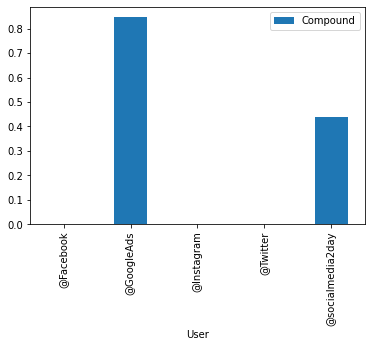

In [45]:
#plotting 
score_table.plot(kind='bar')

In [46]:
#Collect the compound values for each news source
score_table = dfws.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
score_table

Positive
User                      
@Facebook            0.000
@GoogleAds           0.350
@Instagram           0.000
@Twitter             0.000
@socialmedia2day     0.266

<AxesSubplot:xlabel='User'>

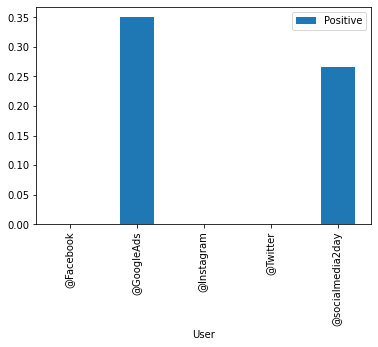

In [47]:
#Collect the negative values for each news source
pos_score_table = dfws.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
pos_score_table
pos_score_table.plot(kind='bar')

In [48]:
#Collect the compound values for each news source
score_table = dfws.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
score_table

Negative
User                      
@Facebook              0.0
@GoogleAds             0.0
@Instagram             0.0
@Twitter               0.0
@socialmedia2day       0.0

<AxesSubplot:xlabel='User'>

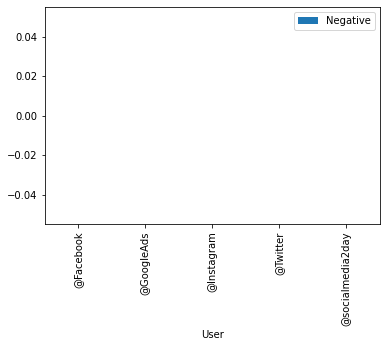

In [49]:
#Collect the negative values for each news source
neg_score_table = dfws.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table
neg_score_table.plot(kind='bar')

In [50]:
#Collect the Neutral values for each news source
neu_score_table = dfws.pivot_table(index='User',  values="Neutral", aggfunc = np.mean)
neu_score_table

Neutral
User                     
@Facebook           1.000
@GoogleAds          0.650
@Instagram          1.000
@Twitter            1.000
@socialmedia2day    0.734

<AxesSubplot:xlabel='User'>

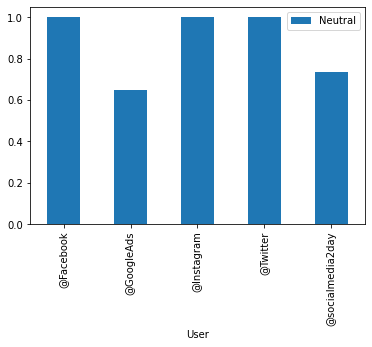

In [51]:
#Collect the Neutral values for each news source
neu_score_table = dfws.pivot_table(index='User',  values="Neutral", aggfunc = np.mean)
neu_score_table
neu_score_table.plot(kind='bar') 

CH stopped here ...

In [52]:
from pandas import DataFrame
#creates list for top positive hashtags used between comp_searches variable 
from collections import Counter
word_appearance_count = dict(Counter(HT_positive))
df4 = DataFrame (HT_positive, columns = ['Positive HT']) #, 'Count']
print(df4)

Empty DataFrame
Columns: [Positive HT]
Index: []


In [53]:
from collections import Counter
a = dict(Counter(HT_positive))
print(a)

{}


In [54]:
t = list(a.items())
print(t)

[]


In [55]:
import pandas as pd
#tuples = [(letter, idx) for idx, letter in enumerate(t)]
df = pd.DataFrame(t, columns=["Positive Hashtag", "Number of Occurence"])
print(df)

Empty DataFrame
Columns: [Positive Hashtag, Number of Occurence]
Index: []
